## Part- I: Data Analytics - Insurance Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt

In [3]:
data = pd.read_csv('insurance.csv')
data_u = data
data=data.sort_values(by='charges',ascending='true')
data

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.210,0,no,southeast,1121.87390
808,18,male,30.140,0,no,southeast,1131.50660
1244,18,male,33.330,0,no,southeast,1135.94070
663,18,male,33.660,0,no,southeast,1136.39940
22,18,male,34.100,0,no,southeast,1137.01100
...,...,...,...,...,...,...,...
819,33,female,35.530,0,yes,northwest,55135.40209
577,31,female,38.095,1,yes,northeast,58571.07448
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [4]:
#calcluating the sum of null entries
print(data.isna().sum().sum())


0


In [5]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [6]:
# the charges of a insurance is affected by the factors: bmi, children, smoker(yes or no), region(northwest has a higher impact on the charges)
#we need to assign a factor to the classified values such as smoker, and region and also a value to sex
#first we get the count of classified elements: sex
data_n = data.to_numpy()
#print(data_n)
data_sex = data['sex']
print(data_sex)
data_sex_n = data_sex.to_numpy()
#print(data_sex_n)
data_sex_n_l = data_sex_n.tolist()
res = {}

for i in data_sex_n_l:
    res[i] = data_sex_n_l.count(i)
print(res)

940       male
808       male
1244      male
663       male
22        male
         ...  
819     female
577     female
1230      male
1300      male
543     female
Name: sex, Length: 1338, dtype: object
{'male': 676, 'female': 662}


In [7]:
#number of classifications obtained:2, assigning factor accordingly {female:1, male:1}
print(len(data_sex))
#print(data_cut_n_l)
for i in range(1338):
    if data_sex_n_l[i] == 'female':
        data_sex_n_l[i] = 1
    elif data_sex_n_l[i] == 'male':
        data_sex_n_l[i] = 1
    
#print(data_cut_n_l)
data_sex_n_l_r = np.reshape(data_sex_n_l, (1338,1))
print(data_sex_n_l_r)
        

1338
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [8]:
# the charges of a insurance is affected by the factors: bmi, children, smoker(yes or no), region(northwest has a higher impact on the charges)
#we need to assign a factor to the classified values such as smoker, and region and also a value to sex
#first we get the count of classified elements: smoker
data_n = data.to_numpy()
#print(data_n)
data_smoker = data['smoker']
print(data_smoker)
data_smoker_n = data_smoker.to_numpy()
#print(data_sex_n)
data_smoker_n_l = data_smoker_n.tolist()
res = {}

for i in data_smoker_n_l:
    res[i] = data_smoker_n_l.count(i)
print(res)

940      no
808      no
1244     no
663      no
22       no
       ... 
819     yes
577     yes
1230    yes
1300    yes
543     yes
Name: smoker, Length: 1338, dtype: object
{'no': 1064, 'yes': 274}


In [9]:
#number of classifications obtained:2, assigning factor accordingly {yes:1, no:0}; because smokers are highly susceptable to health porblems
print(len(data_smoker))
#print(data_cut_n_l)
for i in range(1338):
    if data_smoker_n_l[i] == 'yes':
        data_smoker_n_l[i] = 1
    elif data_smoker_n_l[i] == 'no':
        data_smoker_n_l[i] = 0
    
#print(data_cut_n_l)
data_smoker_n_l_r = np.reshape(data_smoker_n_l, (1338,1))
print(data_smoker_n_l_r)

1338
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [10]:
# the charges of a insurance is affected by the factors: bmi, children, smoker(yes or no), region(northwest has a higher impact on the charges)
#we need to assign a factor to the classified values such as smoker, and region and also a value to sex
#first we get the count of classified elements: region
data_n = data.to_numpy()
#print(data_n)
data_region = data['region']
print(data_region)
data_region_n = data_region.to_numpy()
#print(data_region_n)
data_region_n_l = data_region_n.tolist()
res = {}

for i in data_region_n_l:
    res[i] = data_region_n_l.count(i)
print(res)

940     southeast
808     southeast
1244    southeast
663     southeast
22      southeast
          ...    
819     northwest
577     northeast
1230    northwest
1300    southeast
543     southeast
Name: region, Length: 1338, dtype: object
{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}


In [11]:
#number of classifications obtained:4, assigning factor accordingly {northwest:1, northeast:2, southwest:3, southeast:1}; because smokers are highly susceptable to health porblems
print(len(data_region))
#print(data_cut_n_l)
for i in range(1338):
    if data_region_n_l[i] == 'northwest':
        data_region_n_l[i] = 0.4
    elif data_region_n_l[i] == 'southwest':
        data_region_n_l[i] = 0.3
    elif data_region_n_l[i] == 'northeast':
        data_region_n_l[i] = 0.2
    elif data_region_n_l[i] == 'southeast':
        data_region_n_l[i] = 0.1
    
#print(data_cut_n_l)
data_region_n_l_r = np.reshape(data_region_n_l, (1338,1))
print(data_region_n_l_r)

1338
[[0.1]
 [0.1]
 [0.1]
 ...
 [0.4]
 [0.1]
 [0.1]]


In [12]:
bias = np.ones(1338)
data_bmi = data['bmi']
data_bmi_n = data_bmi.to_numpy()
data_bmi_n_l = data_bmi_n.tolist()
data_age = data['age']
data_age_n = data_age.to_numpy()
data_age_n_l = data_age_n.tolist()
data_children = data['children']
data_children_n = data_children.to_numpy()
data_children_n_l = data_children_n.tolist()
data_charges = data['charges']
data_charges_n = data_charges.to_numpy()
data_charges_n_l = data_charges_n.tolist()

In [13]:
data_eval = pd.DataFrame({'bias':bias, 'age':data_age_n_l, 'sex': data_sex_n_l, 'bmi':data_bmi_n_l, 'children':data_children_n_l, 'smoker':data_smoker_n_l, 'region':data_region_n_l})
data_eval

,bias,age,sex,bmi,children,smoker,region
0,1.0,18,1,23.210,0,0,0.1
1,1.0,18,1,30.140,0,0,0.1
2,1.0,18,1,33.330,0,0,0.1
3,1.0,18,1,33.660,0,0,0.1
4,1.0,18,1,34.100,0,0,0.1
...,...,...,...,...,...,...,...
1333,1.0,33,1,35.530,0,1,0.4
1334,1.0,31,1,38.095,1,1,0.2
1335,1.0,52,1,34.485,3,1,0.4
1336,1.0,45,1,30.360,0,1,0.1


In [14]:
print('sum', data_eval.sum())
print('count', data_eval.count())
print('mean', data_eval.mean())
print('Standard Deviation', data_eval.std())
print('Mode', data_eval.mode())
print('Median', data_eval.median())

sum bias         1338.000
age         52459.000
sex          1338.000
bmi         41027.625
children     1465.000
smoker        274.000
region        328.700
dtype: float64
count bias        1338
age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
dtype: int64
mean bias         1.000000
age         39.207025
sex          1.000000
bmi         30.663397
children     1.094918
smoker       0.204783
region       0.245665
dtype: float64
Standard Deviation bias         0.000000
age         14.049960
sex          0.000000
bmi          6.098187
children     1.205493
smoker       0.403694
region       0.113092
dtype: float64
Mode    bias  age  sex   bmi  children  smoker  region
0   1.0   18    1  32.3         0       0     0.1
Median bias         1.0
age         39.0
sex          1.0
bmi         30.4
children     1.0
smoker       0.0
region       0.2
dtype: float64


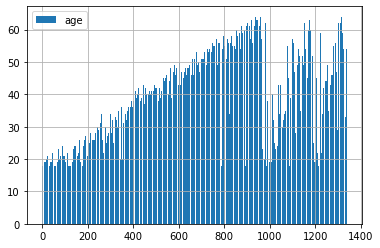

In [15]:
plt.bar(range(1338), data_age_n_l, label='age')
plt.grid()
plt.legend()

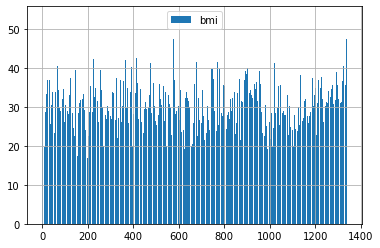

In [16]:
plt.bar(range(1338), data_bmi_n_l, label='bmi')
plt.grid()
plt.legend()

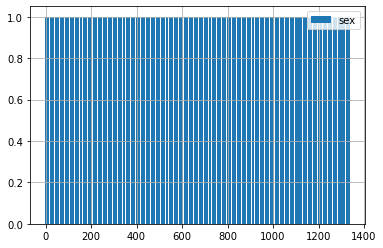

In [17]:
plt.bar(range(1338), data_sex_n_l, label='sex')
plt.grid()
plt.legend()

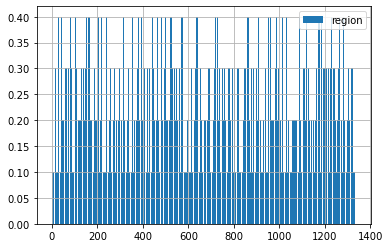

In [18]:
plt.bar(range(1338), data_region_n_l, label='region')
plt.grid()
plt.legend()

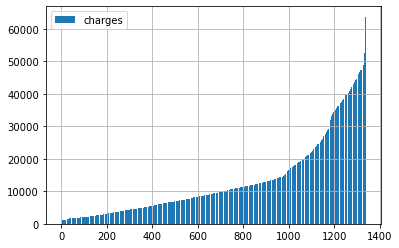

In [19]:
plt.bar(range(1338), data['charges'], label='charges')
plt.grid()
plt.legend()

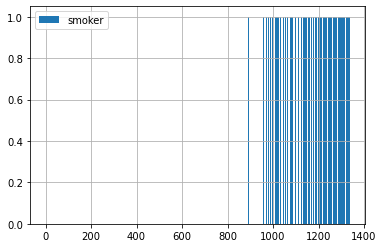

In [20]:
plt.bar(range(1338), data_smoker_n_l, label='smoker')
plt.grid()
plt.legend()

## Part- II: Linear Regression

In [21]:
data_eval_n = data_eval.to_numpy()
data_eval_n_l = data_eval_n.tolist()

In [22]:
#x_train
data_eval_train_n = data_eval_n[276:]
data_eval_train_n_l = data_eval_train_n.tolist()
print(data_eval_train_n)
#x_test
data_eval_test_n = data_eval_n[:276]
data_eval_test_n_l = data_eval_test_n.tolist()
#print(data_eval_test_n)
#y_train
data_charges_train_n = data_charges_n[276:]
data_charges_train_n_l = data_charges_train_n.tolist()
#y_test
data_charges_test_n = data_charges_n[:276]
data_charges_test_n_l = data_charges_train_n.tolist()
data_eval_train_n_tra = np.matrix.transpose(data_eval_train_n)

[[ 1.  28.   1.  ...  1.   0.   0.4]
 [ 1.  31.   1.  ...  0.   0.   0.4]
 [ 1.  30.   1.  ...  0.   0.   0.2]
 ...
 [ 1.  52.   1.  ...  3.   1.   0.4]
 [ 1.  45.   1.  ...  0.   1.   0.1]
 [ 1.  54.   1.  ...  0.   1.   0.1]]


In [23]:
print('Shape of X_Train', np.shape(data_eval_train_n))
print('Shape of Y_Train', np.shape(data_charges_train_n))
print('Shape of X_Test', np.shape(data_eval_test_n))
print('Shape of Y_Test', np.shape(data_charges_test_n))

Shape of X_Train (1062, 7)
Shape of Y_Train (1062,)
Shape of X_Test (276, 7)
Shape of Y_Test (276,)


[[ 1.   1.   1.  ...  1.   1.   1. ]
 [28.  31.  30.  ... 52.  45.  54. ]
 [ 1.   1.   1.  ...  1.   1.   1. ]
 ...
 [ 1.   0.   0.  ...  3.   0.   0. ]
 [ 0.   0.   0.  ...  1.   1.   1. ]
 [ 0.4  0.4  0.2 ...  0.4  0.1  0.1]]
-0.000429626465086802
weights [-6247.10271741   209.09819433 -6247.10271741   423.01821988
   226.49888446 23100.61644181   643.22586744]
4815.310770451309
4133.64165
RSME 6629.7725486777435


Text(0, 0.5, 'predicted value')

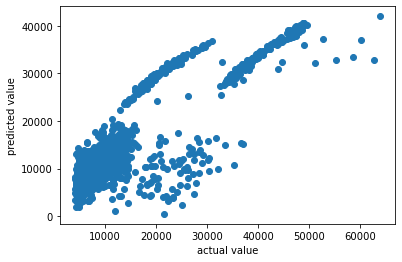

In [24]:
print(data_eval_train_n_tra)
weights_inv = np.dot(data_eval_train_n_tra,data_eval_train_n)
#print(data_eval_train_n_l)
weights_inv_t = np.linalg.pinv(weights_inv)
#print(weights_inv_t)
print(weights_inv_t[0,3])
weights_r = np.dot(data_eval_train_n_tra,data_charges_train_n)
#print(np.shape(weights_r))
#print(weights_r)
weights = np.dot(weights_inv_t,weights_r)
print('weights',weights)
weights_tra = np.matrix.transpose(weights)
predicted_charge_train_scal = np.dot(data_eval_train_n_l,weights_tra)
predicted_charge_train = predicted_charge_train_scal
print(predicted_charge_train[0])
print(data_charges_train_n[0])
error = data_charges_train_n - predicted_charge_train
#print(error)
error_sqr_test = np.square(error)
error_sqr_test_sum = np.sum(error_sqr_test)
RSME = mt.sqrt(error_sqr_test_sum/len(error_sqr_test))
predicted_charge_train = predicted_charge_train
print('RSME',RSME)
plt.scatter(data_charges_train_n,predicted_charge_train)
plt.xlabel('actual value')
plt.ylabel('predicted value')
#plt.scatter(range(276),data_charges_train_n)

RSME 3805.579424351065


Text(0, 0.5, 'predicted value')

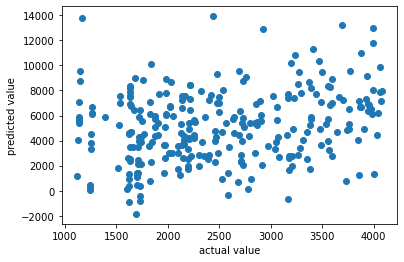

In [25]:
predicted_charge_test = np.dot(data_eval_test_n,weights_tra)
predicted_charge_test_n_l = predicted_charge_test.tolist()
#print(predicted_charge_test_n_l)
#print(data_charges_test_n_l)
error = data_charges_test_n - predicted_charge_test
#print(error)
error_sqr = np.square(error)
#print(error_sqr)
error_sqr_sum = np.sum(error_sqr)
#print(error_sqr_sum)
RSME = (error_sqr_sum/len(error_sqr))**0.5
print('RSME',RSME) 
plt.scatter(data_charges_test_n, predicted_charge_test_n_l)
plt.xlabel('actual value')
plt.ylabel('predicted value')
#plt.scatter(range(1062),data_charges_test_n )

## Part-III: Ridge Regression

Ridge Regression RSME: 6629.904187519106
Ridge Regression Weights: [-6132.63806991   207.52796461 -6132.63806929   420.00453687
   219.37186443 23018.36332981   504.59633668]


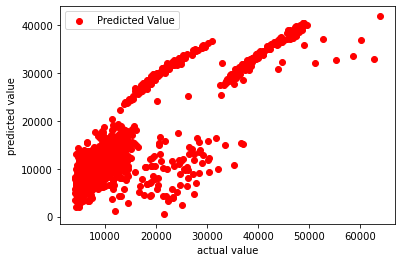

In [26]:
l = 0.55 #assuming value 0.5 for lambda
weights_rid = np.dot(np.linalg.pinv(weights_inv + l*np.eye(len(weights_inv))),weights_r)
weights_rid_tra = np.matrix.transpose(weights_rid)
predict_rid_train = np.dot(data_eval_train_n_l,weights_rid_tra)
error_rid = data_charges_train_n_l - predict_rid_train
error_rid_tra = np.matrix.transpose(error_rid)
error_rid_sqr = np.square(error_rid)
error_rid_sqr_sum = np.sum(error_rid_sqr)
RSME_rid = (error_rid_sqr_sum/len(error_rid_sqr))**0.5
print('Ridge Regression RSME:',RSME_rid)
print('Ridge Regression Weights:', weights_rid)
plt.scatter(data_charges_train_n,predict_rid_train, color = 'r', label = 'Predicted Value')
plt.xlabel('actual value')
plt.ylabel('predicted value')
#plt.scatter(range(276),data_charges_train_n, label = 'Actual Value')
plt.legend()


(276,)
(276,)
Ridge Regression RSME: 6629.904187519106


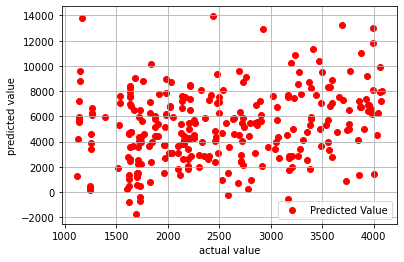

In [27]:
predict_rid_test = np.dot(data_eval_test_n_l,weights_rid_tra)
print(np.shape(predict_rid_test))
print(np.shape(data_charges_test_n))
error_rid_test = data_charges_test_n - predict_rid_test
error_rid_tra_test = np.matrix.transpose(error_rid_test)
error_rid_sqr_test = np.square(error_rid_test)
error_rid_sqr_sum_test = np.sum(error_rid_sqr_test)
RSME_rid_test = (error_rid_sqr_sum_test/len(error_rid_sqr_test))**0.5
print('Ridge Regression RSME:',RSME_rid)
plt.scatter(data_charges_test_n, predict_rid_test, color = 'r', label = 'Predicted Value')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.grid()
#plt.scatter(range(1062),data_charges_test_n, label = 'Actual Value')
plt.legend()

## Part IV: Gradient Descent

[3.66498887e+34 1.68526518e+36 3.66498887e+34 1.14910196e+36
 4.48306971e+34 8.70764959e+33 8.98303745e+33]
Gradient Descent RSME 1.1127645115163645e+38
Gradient Descent Weights [3.66498887e+34 1.68526518e+36 3.66498887e+34 1.14910196e+36
 4.48306971e+34 8.70764959e+33 8.98303745e+33]


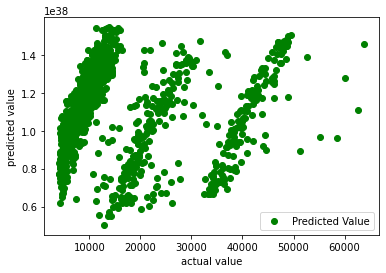

In [28]:
alpha = 0.1 #Assuming alpha as 0.2
weights_grad = weights_rid

for i in range(7):
    del_j = -2*weights_r + 2*np.dot(weights_inv,weights_grad)
    weights_grad = weights_grad-alpha*del_j
weights_grad = np.array(weights_grad)
print(weights_grad)
weights_grad_tra = np.matrix.transpose(weights_grad)
predict_grad_train = np.dot(data_eval_train_n,weights_grad_tra)
error_grad_train = data_charges_train_n - predict_grad_train
error_grad_train_sqr = np.square(error_grad_train)
error_grad_train_sqr_sum = np.sum(error_grad_train_sqr)
RSME_grad_train = (error_grad_train_sqr_sum/len(error_grad_train_sqr))**0.5
print('Gradient Descent RSME', RSME_grad_train)
print('Gradient Descent Weights', weights_grad)
plt.scatter(data_charges_train_n,predict_grad_train, color = 'g', label = 'Predicted Value')
plt.xlabel('actual value')
plt.ylabel('predicted value')
#plt.scatter(range(276),data_charges_train_n, label = 'Actual Value')
plt.legend()

Gradient Descent RSME 7.324600442693655e+37


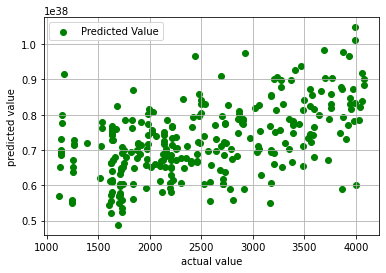

In [29]:
predict_grad_test = np.dot(data_eval_test_n,weights_grad_tra)
error_grad_test = data_charges_test_n - predict_grad_test
error_grad_test_sqr = np.square(error_grad_test)
error_grad_test_sqr_sum = np.sum(error_grad_test_sqr)
RSME_grad_test = (error_grad_test_sqr_sum/len(error_grad_test_sqr))**0.5
print('Gradient Descent RSME', RSME_grad_test)
plt.scatter(data_charges_test_n,predict_grad_test, color = 'g', label = 'Predicted Value')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.grid()
#plt.scatter(range(1062),data_charges_test_n, label = 'Actual Value')
plt.legend()

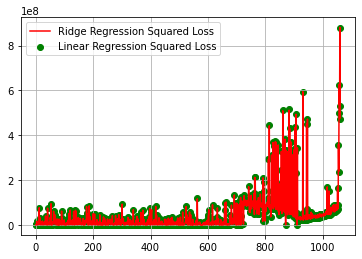

In [30]:
plt.scatter(range(1062), error_sqr_test, color = 'g', label = 'Linear Regression Squared Loss')
plt.plot(range(1062), error_rid_sqr, color = 'r', label = 'Ridge Regression Squared Loss')
#plt.plot(range(1062), error_grad_train_sqr, color = 'b', label = 'Gradient Descent Squared Loss')
plt.grid()
plt.legend()

## References

In [272]:
#https://numpy.org/doc/stable/index.html
#https://pandas.pydata.org/
#google searches on how to matrix multiplications, mattrix transpose, matrix reshapes
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html